In [22]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 18 13:05:13 2017

@author: maxime
"""


import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#create quadratic 2D problem


In [23]:
def quadratic_problem2d(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

In [24]:
def cost(x):
    return 1/2*x.T@P@x+q.T@x+r

In [25]:
def gradient(x):
    return P@x+q


In [26]:
def steepest_descent(x0,cost,gradient,step,epsilon=1e-6,max_iter=1e5):
    k=0
    xlist=[]
    flist=[]
    nlist=[]
    while np.linalg.norm(gradient(x0))>epsilon and k<max_iter:
        d_k=-gradient(x0)
        x0=x0+step*d_k
        k=k+1
        nlist.append(np.linalg.norm(gradient(x0)))
        xlist.append(x0)
        flist.append(cost(x0)) 
    return xlist,flist,nlist

/tmp/ipykernel_8577/3828591688.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


<Figure size 1800x1000 with 0 Axes>

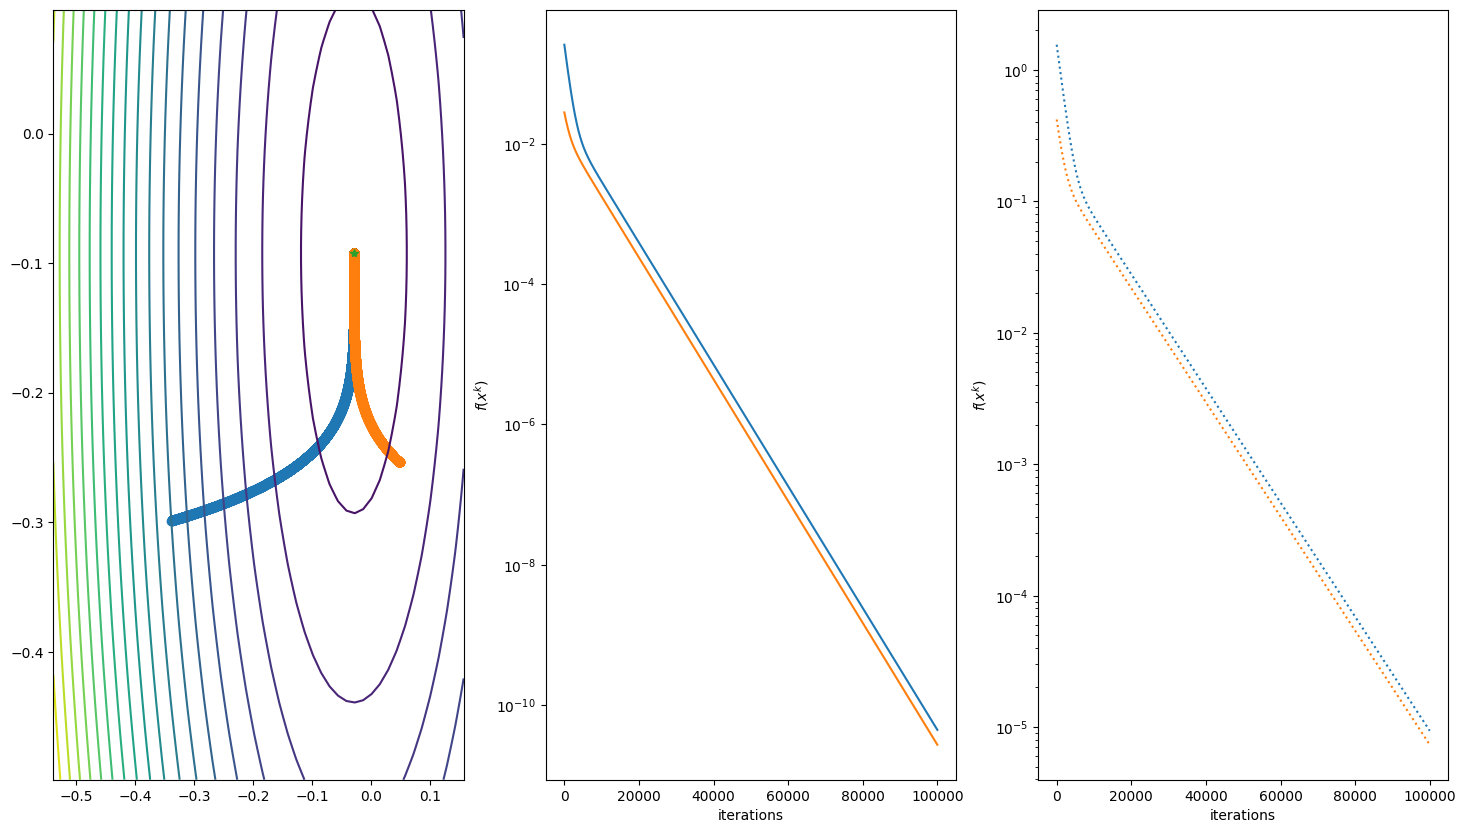

In [32]:
Lambda = np.array((5,1))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q)
fmin  = cost(xstar)


#grid
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

for test in range(2):
    x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
    #
 
    xlist,flist,nlist =  steepest_descent(x0,cost,gradient,1e-4)
    xlist = np.asarray(xlist)
    #
    plt.figure(figsize=(18,10))
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()

In [28]:
def backtrak(x_k,d,sig):
    rho=1e-3
    c=1e-4
    if cost(x_k+sig*d)>cost(x_k)+c*sig*gradient(x_k)*d :
        sig=rho*backtrak(x_k,d,sig)
    else:
        return sig

In [29]:
def methode_bactrack(x0,cost,gradient,epsilon=1e-6,max_iter=1e5,rho=1e-3,c=1e-4,sig=1e-2):
    k=0
    xlist=[]
    flist=[]
    nlist=[]
    while np.linalg.norm(gradient(x0))>epsilon and k<max_iter:
        d_k=-gradient(x0)
        step=backtrak(x0,d_k,sig)
        x0=x0+step*d_k
        k=k+1
        nlist.append(np.linalg.norm(gradient(x0)))
        xlist.append(x0)
        flist.append(cost(x0)) 
    return xlist,flist,nlist